## Introduction
---
- We have a dataset containing information about patients and their probability of having a heart attack.
- The goal is to predict a patient's chance of a heart attack (field `output`) based on their features.

- Our dataset contains:
    - age : Age of the patient

    - sex : Sex of the patient

    - exang : exercise induced angina (1 = yes; 0 = no)

    - ca: number of major vessels (0-3)

    - cp : Chest Pain type chest pain type
        - Value 1: typical angina
        - Value 2: atypical angina
        - Value 3: non-anginal pain
        - Value 4: asymptomatic
        
    - trtbps : resting blood pressure (in mm Hg)

    - chol : cholestoral in mg/dl fetched via BMI sensor

    - fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

    - rest_ecg : resting electrocardiographic results
        - Value 0: normal
        - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

    - thalach : maximum heart rate achieved

    - target : 0= less chance of heart attack 1= more chance of heart attack

## Initial libraries and functions
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [2]:
def find_bestK(to_k, X_train, y_train, X_test, y_test):
    accuracy_eval = np.zeros(to_k + 1)
    
    for i in range(1, to_k + 1):
        knn_model = KNeighborsClassifier(n_neighbors = i).fit(X_train, y_train)
        
        y_hat = knn_model.predict(X_test)
        
        accuracy_eval[i] = accuracy_score(y_test, y_hat)
    
    best_k = np.where(accuracy_eval == accuracy_eval.max())[0][0]
    
    print(f'Best K possible : {best_k} \nIts Accuracy : {accuracy_eval.max()}')
    
    return best_k

## Exploratory data analysis (EDA)
---
- Dataset looks clean, doesn't require cleaning that much.

In [3]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


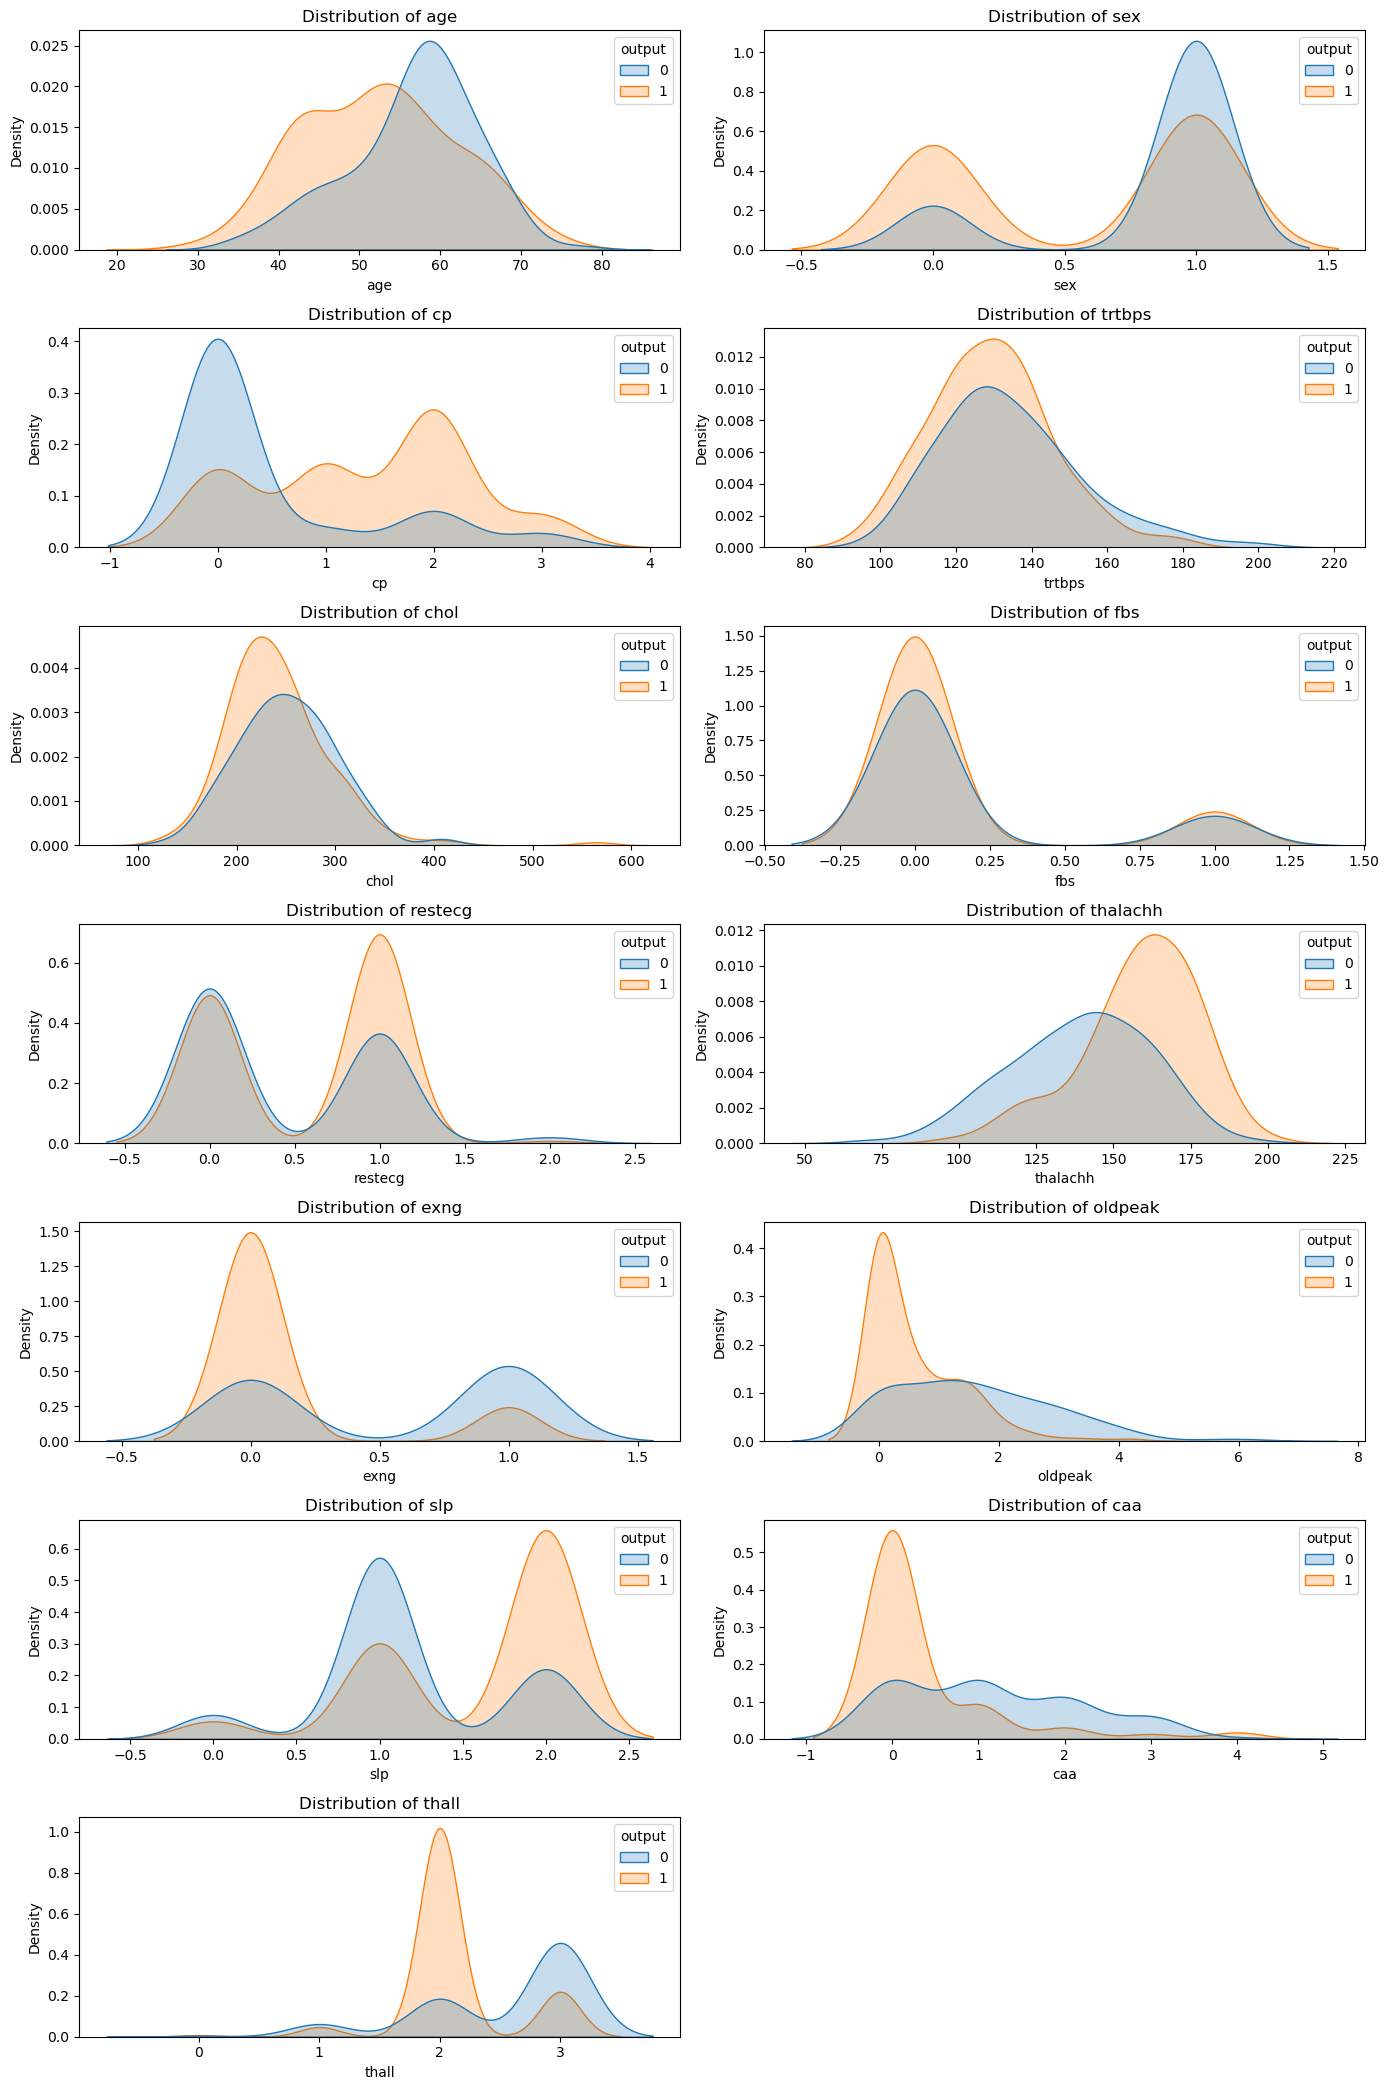

In [5]:
features = df.drop('output', axis=1).columns

ncols = 2
nrows = len(features) // ncols + 1

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, nrows * 3))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.kdeplot(data=df, x=feature, hue='output', fill=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')

if len(features) % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()

## KNN classification
---

### Preprocessing

In [6]:
X, y = df.drop('output', axis=1), df['output']


scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [7]:
best_k = find_bestK(10, X_train, y_train, X_test, y_test)

Best K possible : 8 
Its Accuracy : 0.8524590163934426


### Training our model

In [8]:
model = KNeighborsClassifier(n_neighbors=best_k).fit(X_train, y_train)

y_hat = model.predict(X_test)

### Plotting confusion matrix and evaluating our model

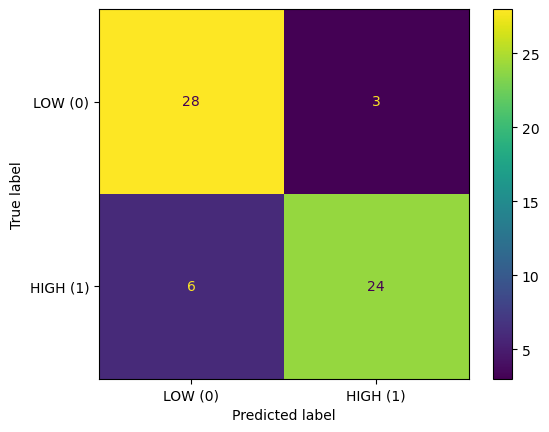

In [9]:
cm = confusion_matrix(y_test, y_hat)

cm_display = ConfusionMatrixDisplay(cm, display_labels=['LOW (0)', 'HIGH (1)'])
cm_display.plot()

In [10]:
print(classification_report(y_pred=y_hat, y_true=y_test))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        31
           1       0.89      0.80      0.84        30

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



---
<center>
    <h3>
        <i>
            This concludes the notebook. Feel free to reach out with any questions or suggestions!
        </i>
    </h3>
</center>